# Lab Assignment Two: Exploring Image Data

### Luis Garduno

## 1. Business Understanding
#### <u>`About STL-10`</u>

Inspired by the
<a href="http://www.cs.toronto.edu/~kriz/cifar.html" target="_top"><b>CIFAR-10</b></a>
dataset, STL-10 is a dataset containing a combination of images (gathered from
<a href="http://www.image-net.org/" target="_top"><b>ImageNet</b></a>)
of animals and transportation objects. Within the dataset there are 6 animal & 4 transportation object classes:
- __Animals__ : bird, cat, deer, dog, horse, monkey
- __Transportation Objects__ : airplane, car, ship, truck

The dataset contains 3 folders that will be used at specified times:
- __Train__ : 5000 images used to train the algorithm
- __Test__ : 8000 images used to test an algorithm (800 images per class)
- __Unlabeled__ : 100,000 unlabeled image files

Aside from having not having identical classes, another difference between the datasets, is that the
images in STL-10 are 3x's the resolution of CIFAR-10's images (96x96 versus 32x32).

STL-10 is specifically an image recognition dataset. The dataset is intended to be used for developing
unsupervised feature learning, deep learning, self-taught algorithms. That being said, the primary prediction
task is to determine the type of animal or transportation object found in each of the pictures in the Unlabeled folder.
Something that should be noted about the "Unlabeled" folder, aside from it containing the the classes mentioned above,
it additionally includes other types of animals (bears, rabbits, etc.) and transportation objects[trains, buses, etc.).

#### <u>`Measuring Success`</u>

One reason this data is important is if trained correctly & the prediction task is achieved, third parties that
use image captcha's for their websites, networks, etc. could use this data as a way to visualize how captcha's can
be bypassed by __unsupervised__ feature learning, which essentially defeats the purpose of having a captcha test.

In order for this data to be of use to third parties using captcha's, I believe the prediction algorithm will
have to render at least an 80% accuracy. The reason it isn't 90% is because if the prediction algorithm selects a
wrong image, or doesn't recognize an image, often times captcha test's will let you get away with about 2 or less errors.

-------------------------------------
Dataset : <a href="https://www.kaggle.com/jessicali9530/stl10" target="_top"><b>STL-10 Kaggle Dataset</b></a>

Question Of Interest : Identify the type of animal or transportation object shown in the picture

----------------------------------------------

## 2. Data Preparation

###  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.1 Loading Data & Adjustments

In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

# Reading in the dataset into a numpy array
file_list = glob.glob('..\Datasets\Train_Small\*.png')
rgb_matrix = np.array([np.array(Image.open(file)) for file in file_list])
print("RGB Matrix Shape :", rgb_matrix.shape, "\n________________________________________")
rgb_matrix[0]

RGB Matrix Shape : (1000, 96, 96, 3) 
________________________________________


array([[[146, 143, 110],
        [146, 143, 110],
        [146, 143, 110],
        ...,
        [162, 159, 126],
        [162, 159, 126],
        [162, 159, 126]],

       [[146, 143, 110],
        [146, 143, 110],
        [146, 143, 110],
        ...,
        [163, 158, 126],
        [163, 158, 126],
        [163, 158, 126]],

       [[146, 143, 110],
        [146, 143, 110],
        [146, 143, 110],
        ...,
        [164, 158, 126],
        [164, 158, 126],
        [164, 158, 126]],

       ...,

       [[130, 114,  81],
        [132, 119,  68],
        [117, 104,  55],
        ...,
        [137, 132, 105],
        [150, 138, 137],
        [141, 122, 116]],

       [[134, 118,  89],
        [155, 141,  96],
        [ 88,  74,  33],
        ...,
        [135, 131, 108],
        [136, 124, 120],
        [137, 120,  99]],

       [[135, 119, 110],
        [ 97,  83,  65],
        [116, 104,  71],
        ...,
        [138, 127, 119],
        [147, 136, 122],
        [138, 128,  93]]

In [2]:
# Create new numpy array with recolored grayscaled images
greyscale_matrix = np.array([np.array(Image.open(file).convert("L")) for file in file_list])
print("Greyscale Matrix Shape :", greyscale_matrix.shape, "\n________________________________________")
greyscale_matrix[0]

Greyscale Matrix Shape : (1000, 96, 96) 
________________________________________


array([[140, 140, 140, ..., 156, 156, 156],
       [140, 140, 140, ..., 156, 156, 156],
       [140, 140, 140, ..., 156, 156, 156],
       ...,
       [115, 117, 102, ..., 130, 141, 127],
       [119, 140,  74, ..., 130, 127, 123],
       [123,  85, 104, ..., 129, 138, 127]], dtype=uint8)

A breakdown on what we are able to gather from the shapes of the 2 numpy arrays :
- Number of images loaded into numpy array : 1000
- Width = Height = 96 (Resolution 96*96)
- Number of Channels (Depth) :
    - RGB Matrix : 3
    - Greyscale Matrix : 1

RGB Matrix Size : Width * Height * Depth = 27,648 pixels per image
Greyscale Matrix Size : Width * Height * Depth = 9,216 pixels per image
By greyscaling all of the images, it reduces the size of the feature vectors which enables faster computing.

Additionally the data was successfully linearized so that each row in the numpy array is 1 image.

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.2 Visualizing Images

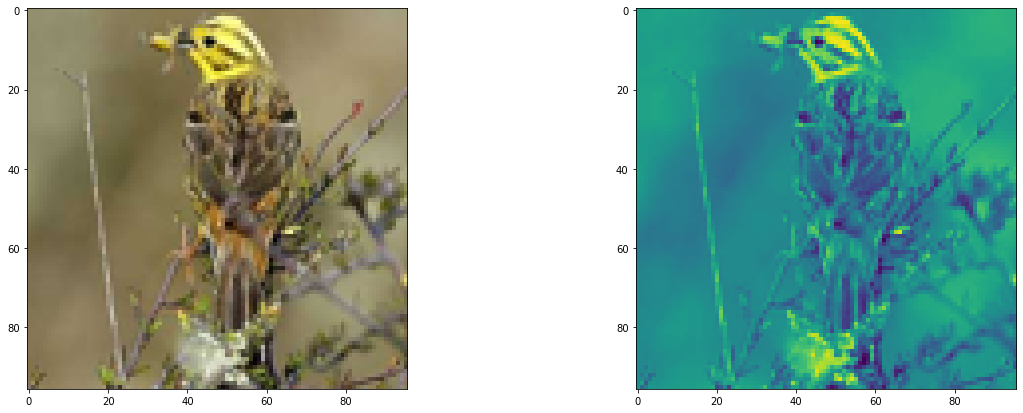

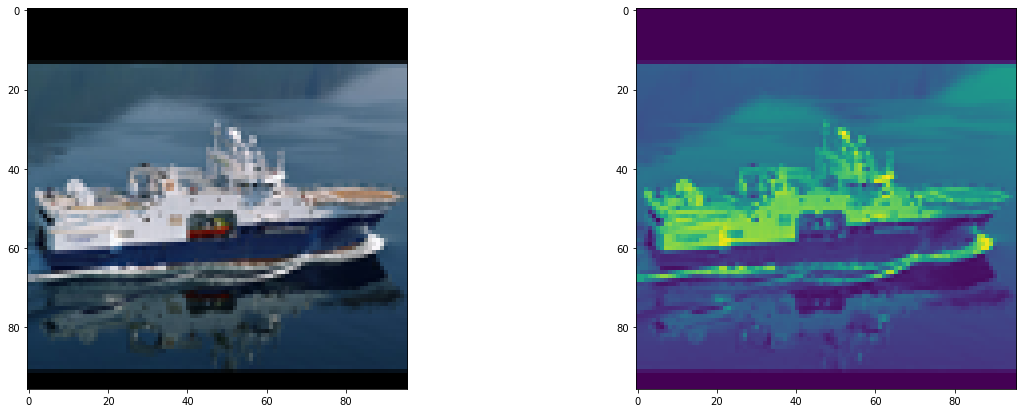

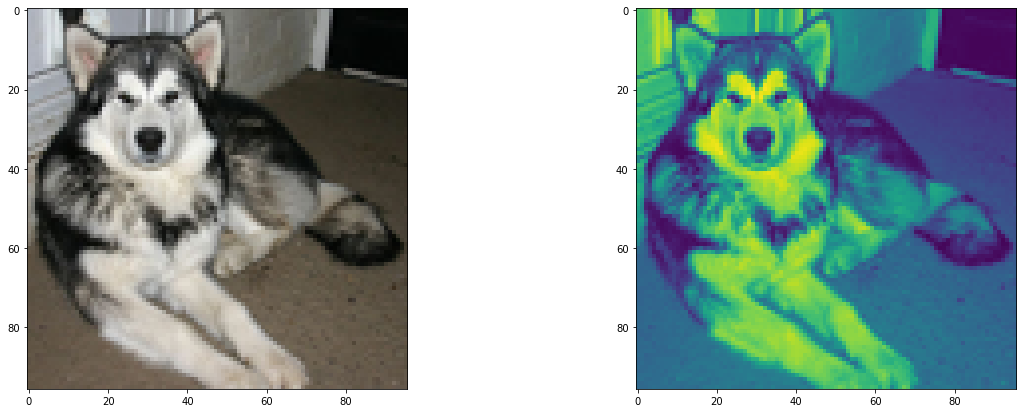

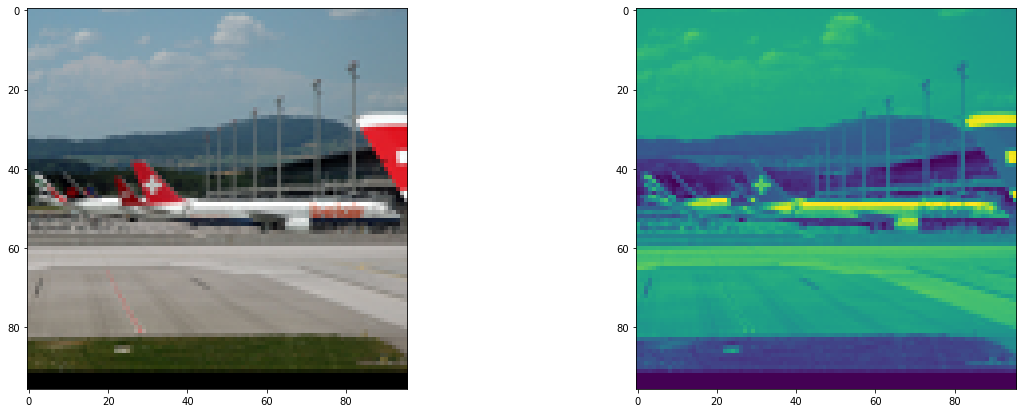

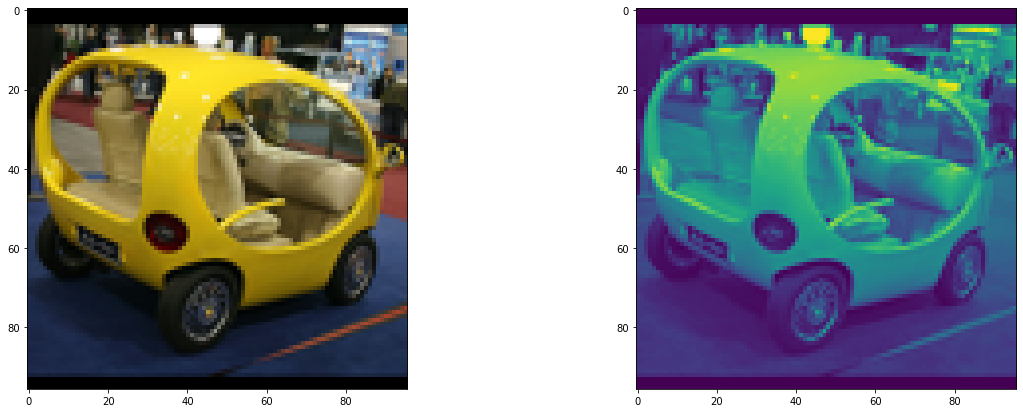

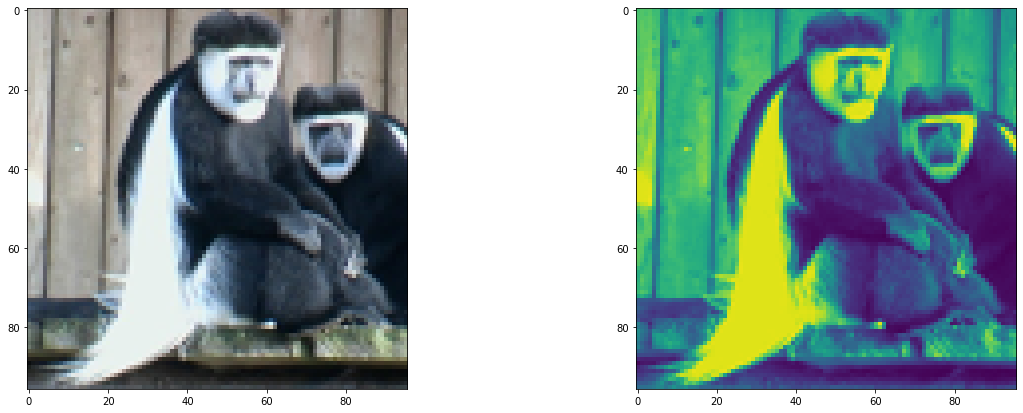

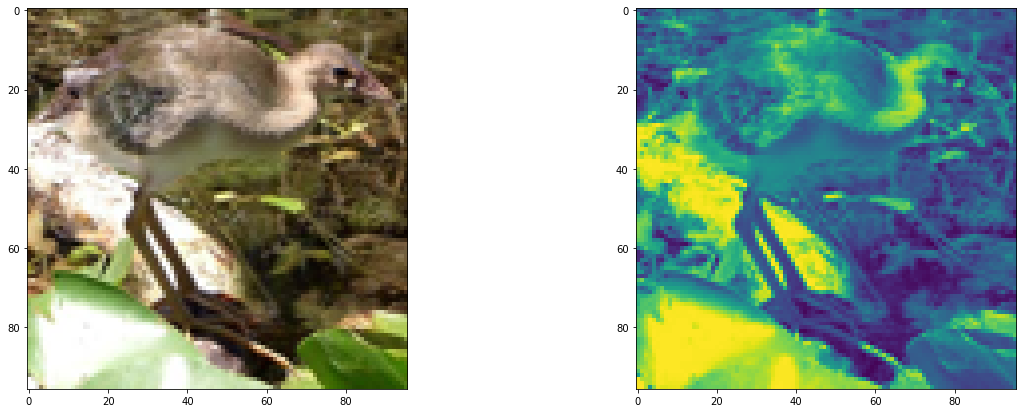

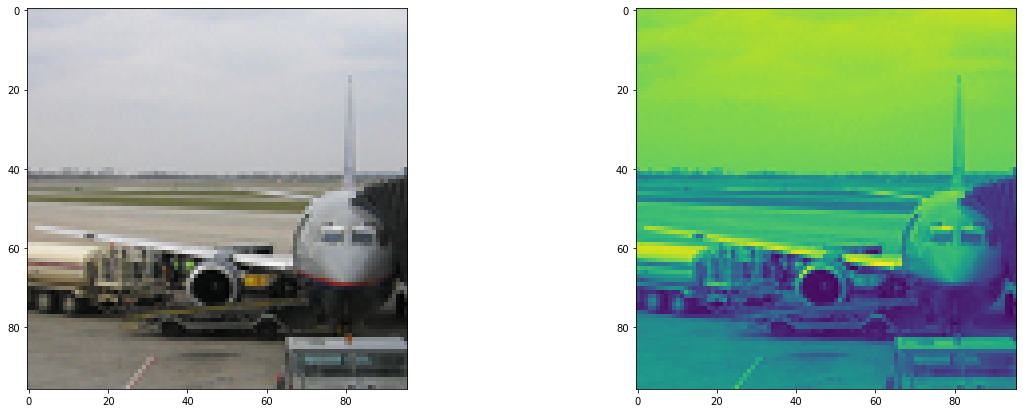

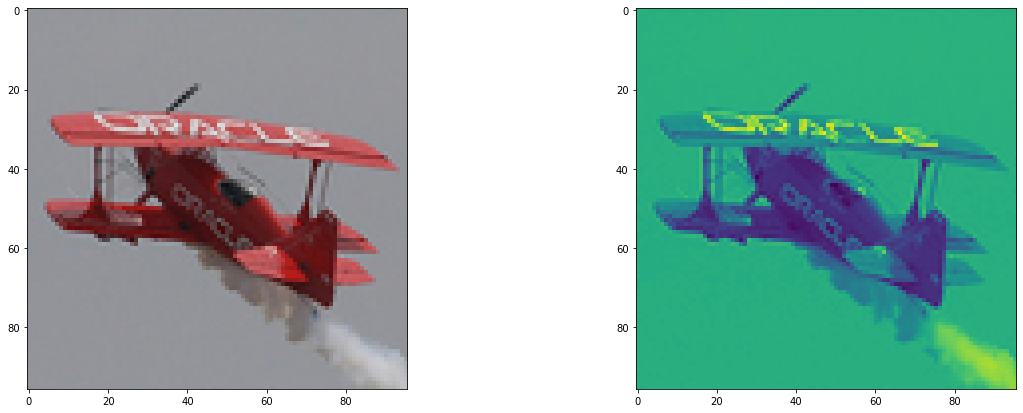

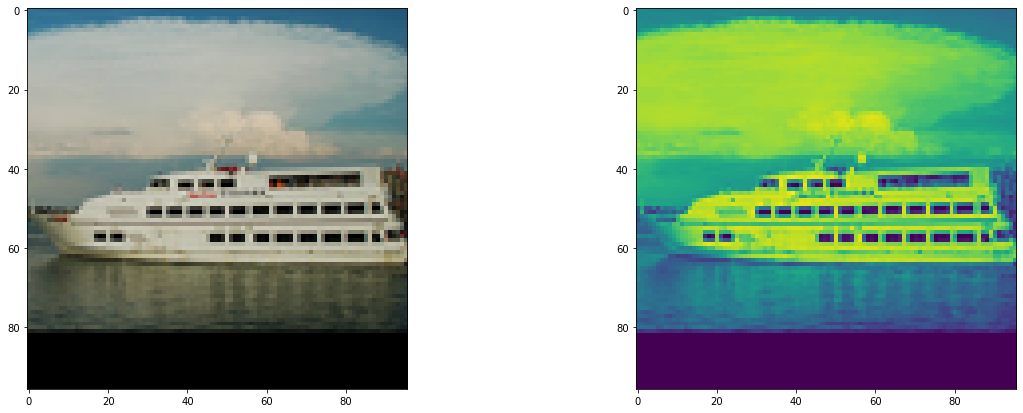

In [3]:
c = 0
plt.subplots(figsize=(20,7))
for i in range(0,10):
    ax = plt.subplot(1,2,c+1)
    ax.imshow(rgb_matrix[i])
    c=c+1

    ax = plt.subplot(1,2,c+1)
    ax.imshow(greyscale_matrix[i])
    c=c+1

    if c == 2:
        if i != 9:
            plt.subplots(figsize=(20,7))
        c=0

Here, we visualize 10 images from each numpy array, side by side to see the difference between the original
images & the new grayscaled images.

----------------------------

## 3. Data Reduction
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.1 Linear Dimensionality Reduction
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.1.1 PCA [35 points]

In [4]:
# Perform linear dimensionality reduction of the images using __PCA__.
# Visualize the explained variance of each component.
# Analyze how many dimensions are required to adequately represent your image data

Explain your analysis and conclusion

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.1.2 Randomized PCA [40 points]

In [5]:
# Perform linear dimensionality reduction of your image using __Randomized PCA__
# Visualize the explained variance of each component.
# Analyze how many dimensions are required to adequately represent your image data

Explain your analysis and conclusion

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.1.3 PCA vs Randomized PCA [60 points]

In [6]:
# Compare the representation using __PCA__ & __Randomized PCA__.
# The method I choose to compare dimensionality methods should quantitatively explain which method
# is better at representing the images w/ fewer components.

Do you prefer one method over another?
Why?

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.2 Feature Extraction [70 points]

In [7]:
# Perform feature extraction upon the images using any feature extraction technique (e.g. gabor
# filters, ordered gradients, DAISY, etc.).

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.3 Visualizing Feature Extraction efficiency [90 points]
    - Does this feature extraction method show promise for your prediction task? Why?
    - Use visualizations to analyze this questions.
    - Example : Visualize the difference __between statistics of extracted features__ in each target class.
    - Example : Use a heat map of the pairwise differences (ordered by class) among all extracted features.
    - Example : build a nearest neighbor classifier to see actual classification performance.


#### References

Kaggle. STL-10. https://www.kaggle.com/jessicali9530/stl10 (Accessed 9-25-2020)

Adam Coates, Honglak Lee, Andrew Y. Ng An Analysis of Single Layer Networks in Unsupervised Feature Learning AISTATS, 2011.
